In [2]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import anndata
import bbknn
import os
from scipy import sparse
import wget
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

/Users/iwes/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


scanpy==1.2.2+166.g6c1daba anndata==0.6.9 numpy==1.14.2 scipy==1.0.1 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
train_path = "../data/pancreas.h5ad"
if os.path.isfile(train_path):
    adata = sc.read(train_path)
else:
    train_url = "https://www.dropbox.com/s/zvmt8oxhfksumw2/pancreas.h5ad?dl=1"
    t_dl = wget.download(train_url, train_path)
    adata = sc.read(train_path)

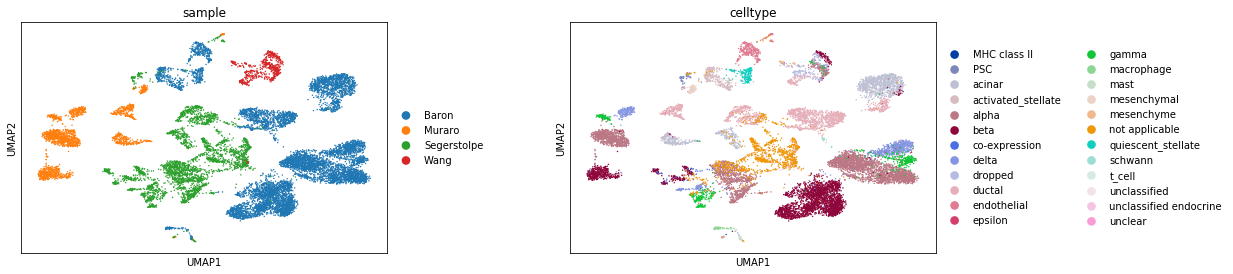

In [4]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['sample','celltype'])



computing batch balanced neighbors
    finished (0:00:10.44) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:00:12.02) --> added
    'X_umap', UMAP coordinates (adata.obsm)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01.87) --> found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


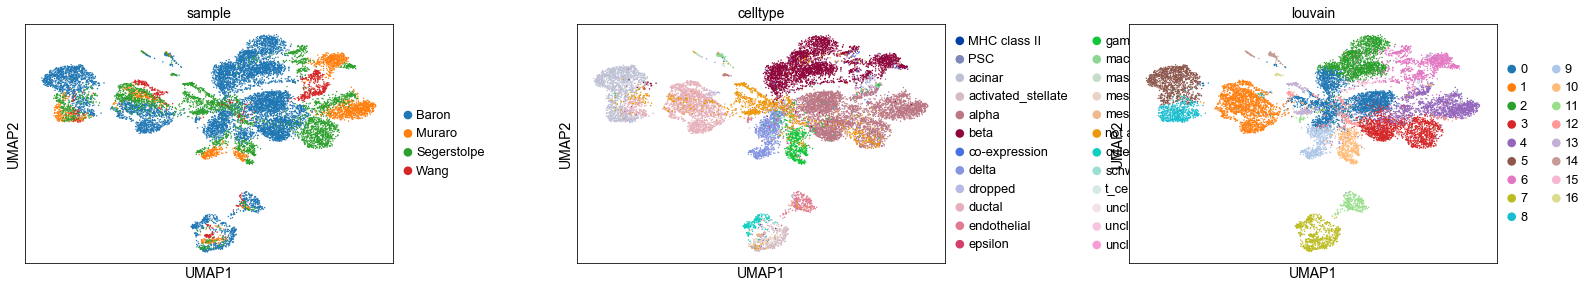

In [4]:
adata_bbknn = bbknn.bbknn(adata, save_knn=True, copy=True,neighbors_within_batch=5,trim=50)
sc.tl.umap(adata_bbknn)
sc.tl.louvain(adata_bbknn)
sc.pl.umap(adata_bbknn, color=['sample','celltype',"louvain"])